### Assignment 6.1

In [16]:
from keras import layers
from keras import models
import pandas as pd
from keras.datasets import mnist
from keras.utils import to_categorical
import os, shutil
from keras.datasets import cifar10

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),
                        activation='relu',
                        input_shape=(28, 28, 1)
                       )) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [21]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3777 - accuracy: 0.8793
Epoch 2/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0488 - accuracy: 0.9843
Epoch 3/5
938/938 [==============================] - 12s 12ms/step - loss: 0.0325 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 12s 12ms/step - loss: 0.0236 - accuracy: 0.9928
Epoch 5/5
938/938 [==============================] - 12s 12ms/step - loss: 0.0194 - accuracy: 0.9941


In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0277 - accuracy: 0.9918


0.9918000102043152

In [24]:
model.save('convn_model_imag.h5')

### Assignment 6.2

#### Assignment 6.2a

In [25]:
import keras

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [28]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 19s 0us/step


In [29]:
train_images.shape
test_images.shape

(10000, 32, 32, 3)

In [30]:
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [31]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 15s 19ms/step - loss: 1.8447 - accuracy: 0.3295 - val_loss: 1.4561 - val_accuracy: 0.4891
Epoch 2/10
782/782 [==============================] - 14s 18ms/step - loss: 1.2257 - accuracy: 0.5652 - val_loss: 1.3007 - val_accuracy: 0.5426
Epoch 3/10
782/782 [==============================] - 14s 18ms/step - loss: 1.0020 - accuracy: 0.6504 - val_loss: 1.0066 - val_accuracy: 0.6443
Epoch 4/10
782/782 [==============================] - 14s 18ms/step - loss: 0.8503 - accuracy: 0.7014 - val_loss: 1.1731 - val_accuracy: 0.6190
Epoch 5/10
782/782 [==============================] - 14s 18ms/step - loss: 0.7417 - accuracy: 0.7417 - val_loss: 1.0865 - val_accuracy: 0.6480
Epoch 6/10
782/782 [==============================] - 14s 18ms/step - loss: 0.6506 - accuracy: 0.7750 - val_loss: 1.0574 - val_accuracy: 0.6654
Epoch 7/10
782/782 [==============================] - 14s 18ms/step - loss: 0.5750 - accuracy: 0.8000 - val_loss: 0.9535 - val_accuracy:

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 5ms/step - loss: 1.0405 - accuracy: 0.7239


0.7239000201225281

In [33]:
import matplotlib.pyplot as plt

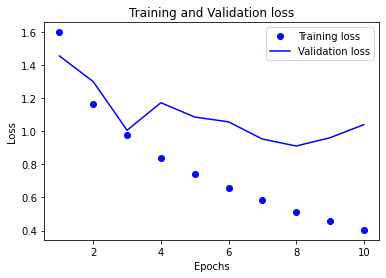

In [34]:
history_dict = history.history
loss_values = history_dict['loss']
accuracy = history_dict['accuracy']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

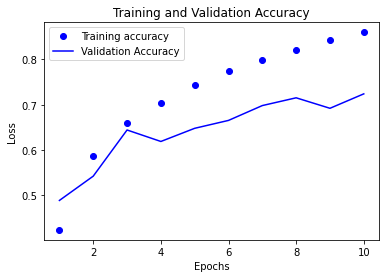

In [35]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Assignment 6.2b

In [36]:
from keras.preprocessing.image import ImageDataGenerator

In [37]:

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
train_gen = train_datagen.flow(train_images, train_labels, batch_size = 64)


history = model.fit(train_gen, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 34s 43ms/step - loss: 0.9221 - accuracy: 0.6913 - val_loss: 0.8747 - val_accuracy: 0.7185
Epoch 2/10
782/782 [==============================] - 33s 42ms/step - loss: 0.8374 - accuracy: 0.7169 - val_loss: 0.7745 - val_accuracy: 0.7396
Epoch 3/10
782/782 [==============================] - 33s 42ms/step - loss: 0.8210 - accuracy: 0.7191 - val_loss: 0.8407 - val_accuracy: 0.7223
Epoch 4/10
782/782 [==============================] - 33s 42ms/step - loss: 0.8151 - accuracy: 0.7233 - val_loss: 0.8096 - val_accuracy: 0.7291
Epoch 5/10
782/782 [==============================] - 33s 42ms/step - loss: 0.7879 - accuracy: 0.7354 - val_loss: 0.8408 - val_accuracy: 0.7324
Epoch 6/10
782/782 [==============================] - 33s 42ms/step - loss: 0.7888 - accuracy: 0.7311 - val_loss: 0.9036 - val_accuracy: 0.7160
Epoch 7/10
782/782 [==============================] - 33s 42ms/step - loss: 0.7851 - accuracy: 0.7312 - val_loss: 0.7921 - val_accuracy:

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.8680 - accuracy: 0.7202


0.7202000021934509

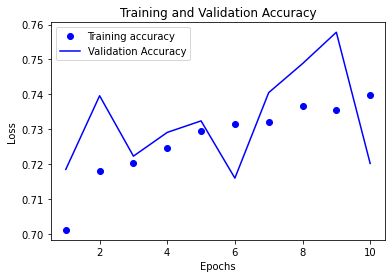

In [39]:
history_dict = history.history
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Assignment 6.3

In [41]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'download.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n04136333', 'sarong', 0.18776146), ('n02837789', 'bikini', 0.17807287), ('n03866082', 'overskirt', 0.08418408)]


In [43]:
c = ['download.jpg', 'download (1).jpg', 'download (2).jpg', 'download (3).jpg', 'download (4).jpg']

In [44]:
list_of_pred = {}
for a in c:
    img_path = a
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
    
    list_of_pred[a]=decode_predictions(preds, top=3)[0]

In [45]:
list_of_pred

{'download.jpg': [('n04136333', 'sarong', 0.18776146),
  ('n02837789', 'bikini', 0.17807287),
  ('n03866082', 'overskirt', 0.08418408)],
 'download (1).jpg': [('n03595614', 'jersey', 0.3287877),
  ('n02916936', 'bulletproof_vest', 0.18357912),
  ('n03710637', 'maillot', 0.1045057)],
 'download (2).jpg': [('n02099712', 'Labrador_retriever', 0.9517665),
  ('n02107908', 'Appenzeller', 0.016944772),
  ('n02100236', 'German_short-haired_pointer', 0.008725707)],
 'download (3).jpg': [('n02093428',
   'American_Staffordshire_terrier',
   0.92381096),
  ('n02100583', 'vizsla', 0.036428563),
  ('n02087394', 'Rhodesian_ridgeback', 0.014135337)],
 'download (4).jpg': [('n04462240', 'toyshop', 0.48105702),
  ('n03089624', 'confectionery', 0.18823342),
  ('n04310018', 'steam_locomotive', 0.12133241)]}

[('n04136333', 'sarong', 0.18776146), ('n02837789', 'bikini', 0.17807287), ('n03866082', 'overskirt', 0.08418408)]


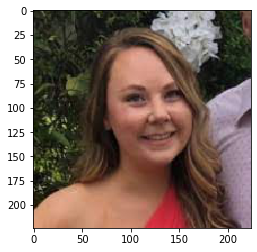

In [47]:
imge = image.load_img('download.jpg', target_size = (224, 224))
imge1 = image.load_img('download (1).jpg', target_size = (224, 224))
imge2 = image.load_img('download (2).jpg', target_size = (224, 224))
imge3 = image.load_img('download (3).jpg', target_size = (224, 224))
imge4 = image.load_img('download (4).jpg', target_size = (224, 224))
print(list_of_pred['download.jpg'])
plt.imshow(imge)

[('n03595614', 'jersey', 0.3287877), ('n02916936', 'bulletproof_vest', 0.18357912), ('n03710637', 'maillot', 0.1045057)]


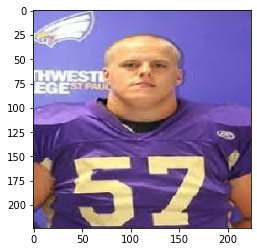

In [48]:
print(list_of_pred['download (1).jpg'])
plt.imshow(imge1)

[('n02093428', 'American_Staffordshire_terrier', 0.92381096), ('n02100583', 'vizsla', 0.036428563), ('n02087394', 'Rhodesian_ridgeback', 0.014135337)]


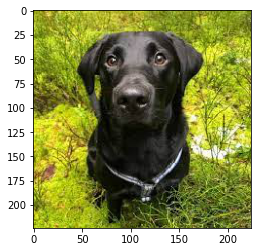

In [50]:
print(list_of_pred['download (3).jpg'])
plt.imshow(imge2)

[('n02099712', 'Labrador_retriever', 0.9517665), ('n02107908', 'Appenzeller', 0.016944772), ('n02100236', 'German_short-haired_pointer', 0.008725707)]


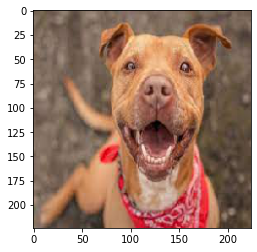

In [51]:
print(list_of_pred['download (2).jpg'])
plt.imshow(imge3)

[('n04462240', 'toyshop', 0.48105702), ('n03089624', 'confectionery', 0.18823342), ('n04310018', 'steam_locomotive', 0.12133241)]


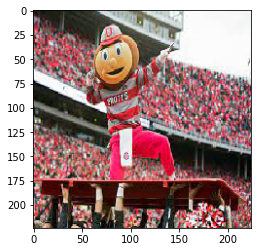

In [52]:
print(list_of_pred['download (4).jpg'])
plt.imshow(imge4)